### Task 1: Apply Edge Detection Using K-Mean
- Import an image without displaying it
- Using K-Mean clustering from sklearn with parameters
    - Cluster 3 with initialize method random, iterations 100 and using classic EM algorithm
- Display the result after apply K-Mean

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

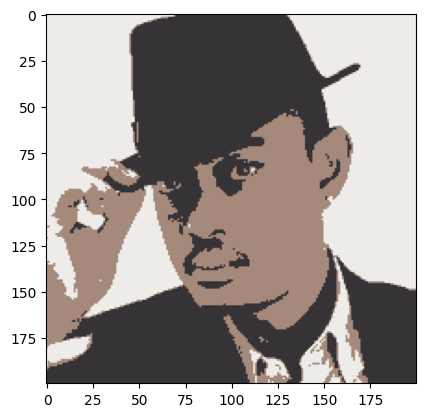

In [2]:
img = cv2.imread("./image/212657710_200x200.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
reshaped_img = np.array(img.reshape((-1, 3)), np.float32)

# Random Initialization, with 3 cluster, and Lloyd algorithm
kmeans = KMeans(n_clusters=3, init="random", random_state=None, n_init="auto", max_iter=100, algorithm="lloyd").fit(reshaped_img)

clusters = np.uint8(kmeans.cluster_centers_)

labels = kmeans.labels_.reshape(img.shape[:2])
    
segmented_image = clusters[labels]

plt.imshow(segmented_image)

### Task 2: Experiment on your K-mean by applying different value
- Import image without display
- Keep these parameters: Initialize method random, iteration 100, and using classical EM algorithm
    - Change cluster value: 1, 3, 6, 9
    - Display 4 of these image in a figure
    - Explain what you notice

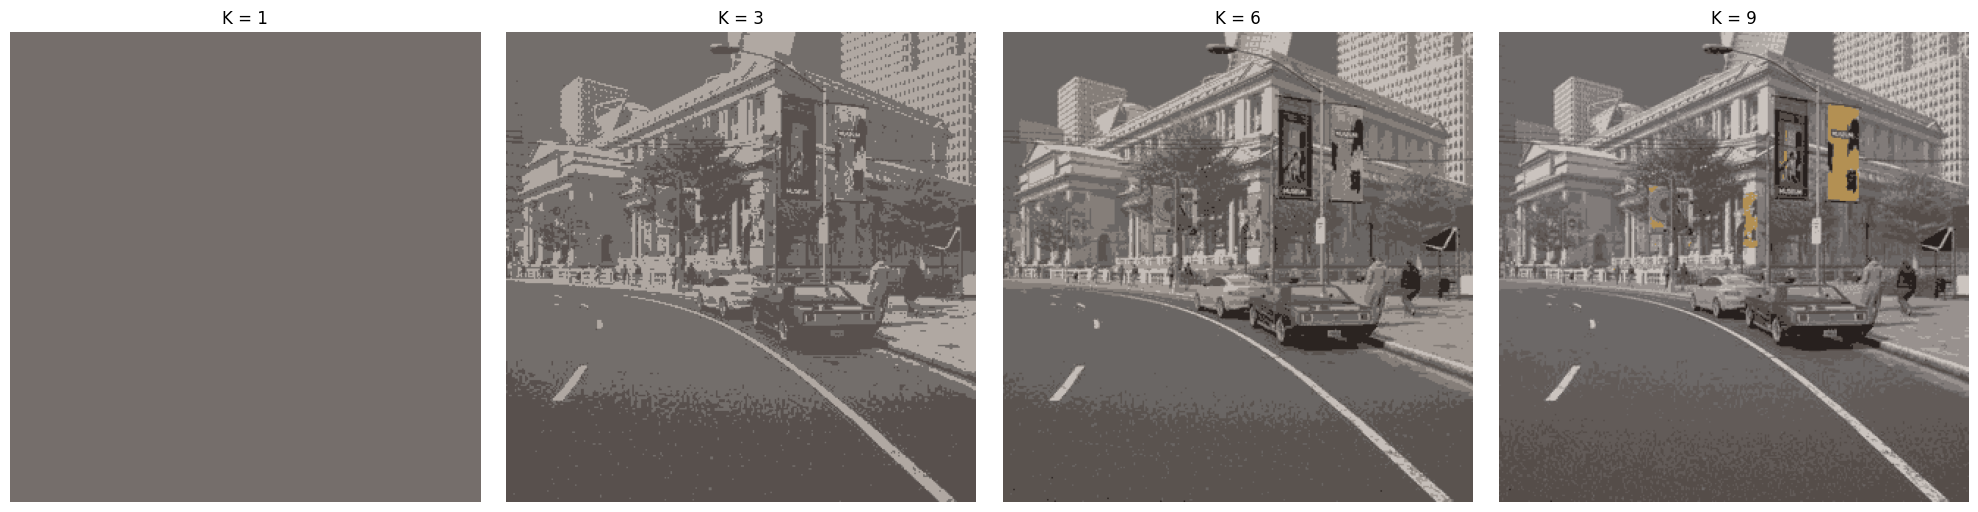

In [7]:
img = cv2.imread("./image/sample.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

reshaped_img = np.array(img.reshape((-1, 3)), np.float32)

cluster_values = [1, 3, 6, 9]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))


for i, k in enumerate(cluster_values):
    """
    Loop through all 4 cluster values, and display the result based on each cluster value
    """
    kmeans = KMeans(n_clusters=k, init="random", random_state=None, 
                    n_init="auto", max_iter=100, algorithm="lloyd").fit(reshaped_img)

    clusters = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_.reshape(img.shape[:2])
    segmented_image = clusters[labels]

    axes[i].imshow(segmented_image)
    axes[i].set_title(f'K = {k}')
    axes[i].axis("off")

plt.tight_layout()
plt.show()

From the results, I notice that as the cluster increases, the more detailed the segmentation gets. This is because as clusters increases, the K-Means are able to segment more color. For example, when K=3, it can segment the image into 3 dofferent color group, and when K=9, it can segment the image into 9 color group, making it able to segment the yellow sign on the street.

### Task 2: Experiment on your K-mean by applying different value (con't)
- Import image without display
- Keep these parameters: Initialize method random, cluster 3, and using traingular inequality algorithm
    - Change iterations value: 1, 10, 50, 100
    - Display 4 of these image in a figure
    - Explain what you notice

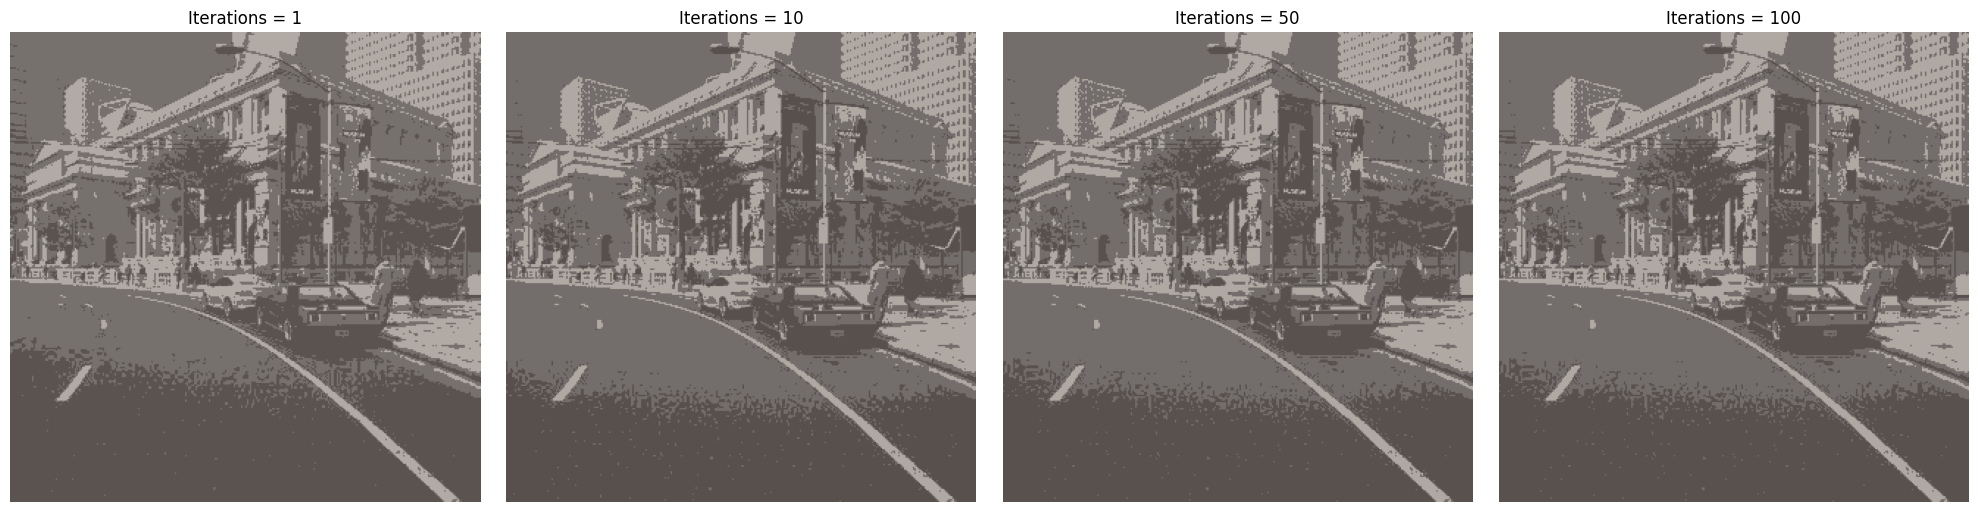

In [8]:
img = cv2.imread("./image/sample.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

reshaped_img = np.array(img.reshape((-1, 3)), np.float32)

iterations_values = [1, 10, 50, 100]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))


for i, k in enumerate(iterations_values):
    """
    Loop through all 4 cluster values, and display the result based on each cluster value
    """
    kmeans = KMeans(n_clusters=3, init="random", random_state=None, 
                    n_init="auto", max_iter=k, algorithm="elkan").fit(reshaped_img)

    clusters = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_.reshape(img.shape[:2])
    segmented_image = clusters[labels]

    axes[i].imshow(segmented_image)
    axes[i].set_title(f'Iterations = {k}')
    axes[i].axis("off")

plt.tight_layout()
plt.show()

Overall, there is not major changes happening when changing iterations value. This may due to the fact that the number of cluster is making it hard for the model to seperate the image into more color group

### Task 3: Compare the difference between Otsu, and K-Means

វិធីសាស្ត្ររបស់ Otsu គឺជាបច្ចេកទេសកំណត់ Threshold ដោយស្វ័យប្រវត្តិដែលបែងចែករូបភាពដោយបង្កើនភាពខុសប្លែកគ្នារវាង Pixel Intensity ផ្ទៃខាង foreground និងផ្ទៃខាង background ខណៈពេលដែល K-Means គឺជា clustering algorithm ដែលដាក់ pixel ជាចង្កោមដោយផ្អែកលើភាពស្រដៀងគ្នានៃពណ៌របស់ពួកគេ ជាធម្មតាប្រើមុខងារដូចជាតម្លៃ RGB ជាដើម។